# Deep Learning Regression with Admissions Data_version2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


df = pd.read_csv('admissions_data.csv')

features = df.iloc[:,1:-1]
labels = df.iloc[:,-1]
print(features.head())

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)



model = Sequential([
layers.InputLayer(input_shape=(features_train.shape[1],)),
layers.Dense(6, activation='relu'),
layers.Dropout(0.2),
layers.Dense(6, activation='relu'),
layers.Dense(1),
])

opt = keras.optimizers.Adam(learning_rate = 0.1)
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

history = model.fit(features_train, labels_train, epochs=40, batch_size=250, verbose=1, validation_split=0.2)
res_mse, res_mae = model.evaluate(features_test, labels_test)

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0
Train on 360 samples, validate on 90 samples
Epoch 1/40
360/360 [==============================] - 0s 408us/sample - loss: 1.3109 - mean_absolute_error: 0.9670 - val_loss: 0.1732 - val_mean_absolute_error: 0.3241
Epoch 2/40
360/360 [==============================] - 0s 14us/sample - loss: 0.3402 - mean_absolute_error: 0.4648 - val_loss: 0.0598 - val_mean_absolute_error: 0.1976
Epoch 3/40
360/360 [==============================] - 0s 20us/sample - loss: 0.1062 - mean_absolute_error: 0.2558 - val_loss: 0.0435 - val_mean_absolute_error: 0.1879
Epoch 4/40
360/360 [=

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


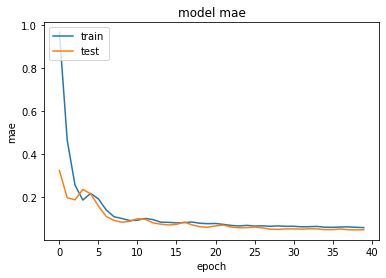

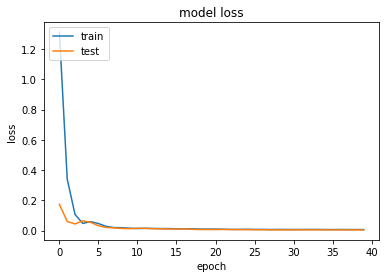

In [5]:
print(history.history.keys())

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()